In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
os.chdir('/home/hassan/Desktop/AIDATAset')

datalist=[]
labels=[]
classes=43
currentPath=os.getcwd()

imgSize=30

image_size = 30

for class_id in range(classes):
    class_path = os.path.join(currentPath,'train', str(class_id))
    if not os.path.isdir(class_path):
        continue  

    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            img = img.resize((image_size, image_size))
            img = np.array(img)
            if img.shape != (30, 30, 3):
                continue
            datalist.append(img)
            labels.append(class_id)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
datalist=np.array(datalist)
labels=np.array(labels)
if len(datalist) == 0:
    raise ValueError("No valid images were loaded.")

np.save('./Training/data',datalist)
np.save('./Training/target',labels)
datalist=np.load('./Training/data.npy')
labels=np.load('./Training/target.npy')
print(datalist.shape)
print(labels.shape)

2025-05-06 22:30:07.404930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(39209, 30, 30, 3)
(39209,)


In [2]:
X_train,X_test,y_train,y_test=train_test_split(datalist,labels,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
y_train = to_categorical(y_train, num_classes=classes)
y_test = to_categorical(y_test, num_classes=classes)


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))  # classes = 43


/home/hassan/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


2025-05-06 22:31:33.786150: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 338763600 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.3128 - loss: 2.5449 - val_accuracy: 0.8859 - val_loss: 0.4799
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step - accuracy: 0.7988 - loss: 0.6206 - val_accuracy: 0.9610 - val_loss: 0.1671
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.8855 - loss: 0.3595 - val_accuracy: 0.9783 - val_loss: 0.1014
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9205 - loss: 0.2496 - val_accuracy: 0.9847 - val_loss: 0.0740
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9346 - loss: 0.2005 - val_accuracy: 0.9870 - val_loss: 0.0505
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9459 - loss: 0.1622 - val_accuracy: 0.9892 - val_loss: 0.0434
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 38ms/step - accuracy: 0.9537 - loss: 0.1398 - val_accuracy: 0.9915 - val_loss: 0.0335
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.9590 - loss: 0.1240 - val_accurac

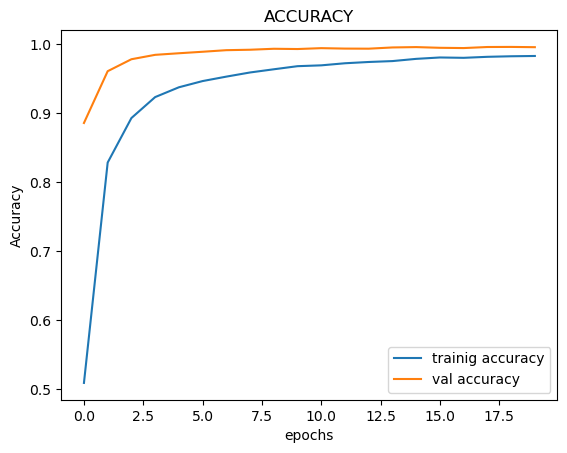

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='trainig accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('ACCURACY')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
def testing(testcsv):
    y_label = pd.read_csv(testcsv)
    labels = y_label["ClassId"].values
    images = y_label["Path"].values
    data = []
    for img_path in images:
        try:
            img = Image.open(os.path.join(currentPath, img_path))
            img = img.resize((30, 30))
            img = np.array(img)
            if img.shape != (30, 30, 3):
                continue
            data.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

    X_test = np.array(data).astype('float32') / 255.0 #list into array
    return X_test, labels

X_test,label=testing('Test.csv')    

In [13]:
y_prob = model.predict(X_test)

# Choose the class with the highest probability
y_pred = np.argmax(y_prob, axis=1)
y_pred

  6/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step  

2025-05-06 22:49:48.297979: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 136404000 exceeds 10% of free system memory.


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


array([16,  1, 38, ..., 32,  7, 10])

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

0.9616785431512272


In [21]:
model.save("./training/TSR.keras")


In [4]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [8]:

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
#from tensorflow.keras.models import load_model

model = load_model("./training/TSR.keras")


/home/hassan/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
